# **Polynomial Regression**

## *Data Import*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 70.4+ KB


**Change bool to int**

In [5]:
map_l = {
    True : 1,
    False : 0
}

df["Legendary"] = df["Legendary"].map(map_l)

In [6]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,0


**Drop object variables**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           742 non-null    int64 
 1   Name        742 non-null    object
 2   Type 1      742 non-null    object
 3   Type 2      368 non-null    object
 4   Total       742 non-null    int64 
 5   HP          742 non-null    int64 
 6   Attack      742 non-null    int64 
 7   Defense     742 non-null    int64 
 8   Sp. Atk     742 non-null    int64 
 9   Sp. Def     742 non-null    int64 
 10  Speed       742 non-null    int64 
 11  Generation  742 non-null    int64 
 12  Legendary   742 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 75.5+ KB


In [8]:
df.drop(["#", "Name", "Type 1", "Type 2"], axis= 1, inplace= True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Total       742 non-null    int64
 1   HP          742 non-null    int64
 2   Attack      742 non-null    int64
 3   Defense     742 non-null    int64
 4   Sp. Atk     742 non-null    int64
 5   Sp. Def     742 non-null    int64
 6   Speed       742 non-null    int64
 7   Generation  742 non-null    int64
 8   Legendary   742 non-null    int64
dtypes: int64(9)
memory usage: 52.3 KB


## *Visualization*

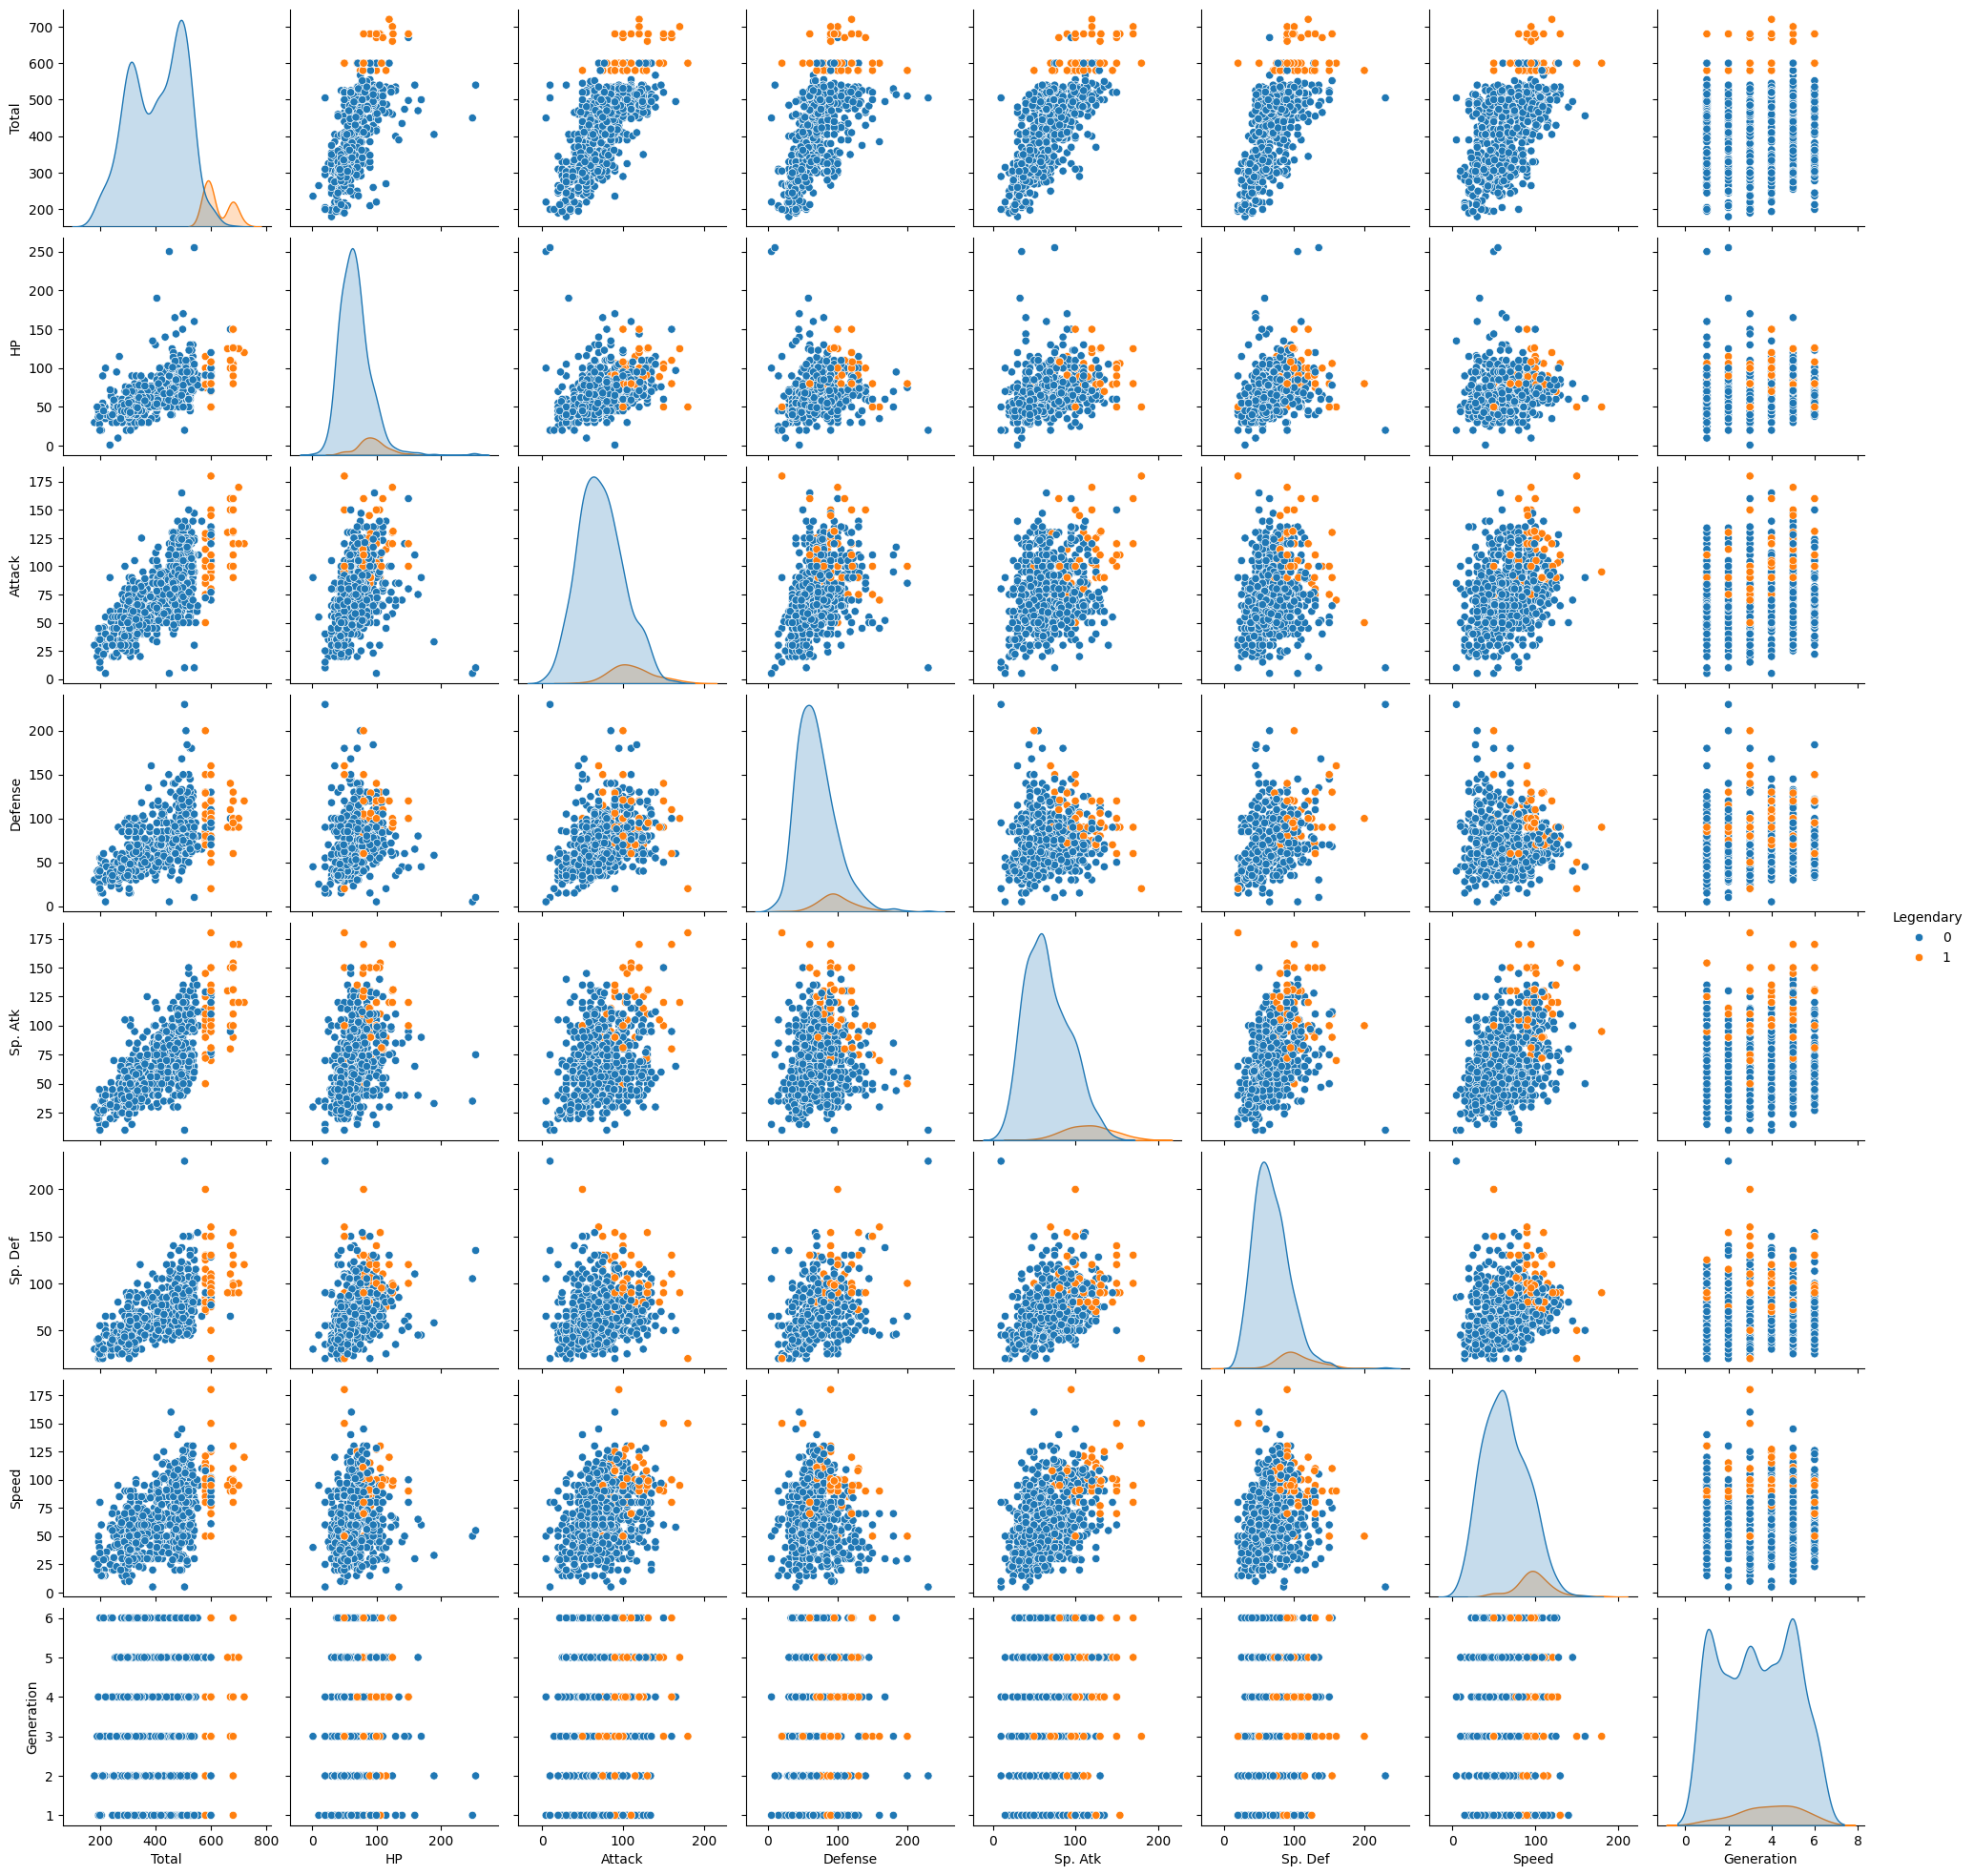

In [10]:
sns.pairplot(df, hue= "Legendary");

<Axes: >

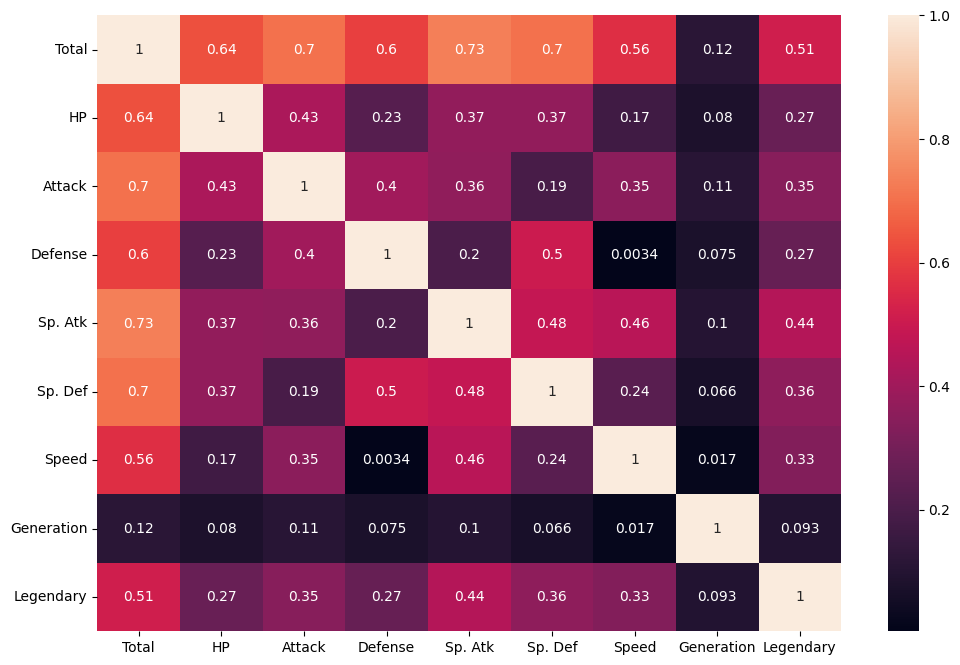

In [11]:
plt.figure(figsize= (12, 8))
sns.heatmap(df.corr(), annot= True)

<Axes: xlabel='Total', ylabel='Legendary'>

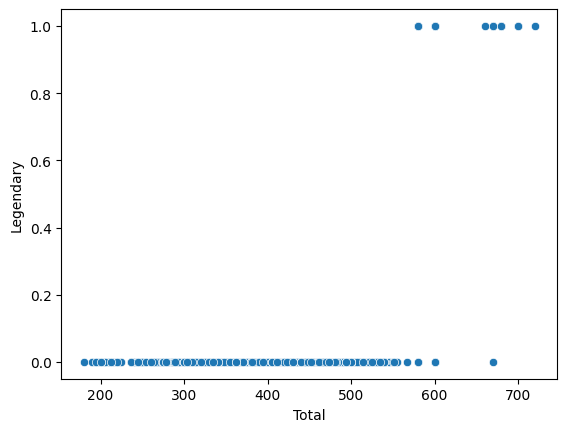

In [12]:
sns.scatterplot(x= "Total", y= "Legendary", data= df)

<Axes: xlabel='HP', ylabel='Legendary'>

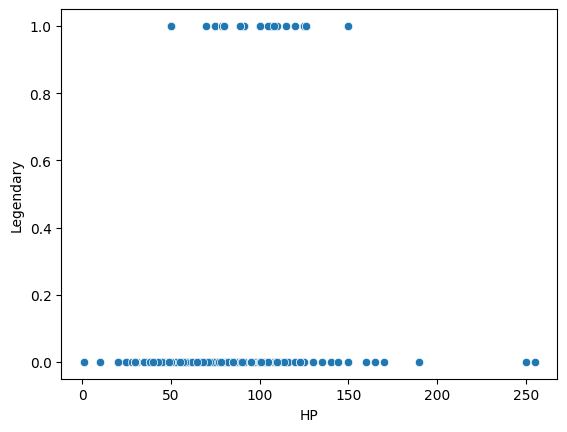

In [13]:
sns.scatterplot(x= "HP", y= "Legendary", data= df)

## *Train Test Split*

In [14]:
X = df.drop("Legendary", axis=1)
y = df["Legendary"]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 9)

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [22]:
log_model.coef_

array([[ 1.56442082, -0.19733289,  0.96006044,  1.27674102,  1.44232266,
         1.14089132,  1.44467002, -0.03855335]])

In [23]:
coef = pd.Series(index= X.columns, data= log_model.coef_[0])

In [24]:
coef

Total         1.564421
HP           -0.197333
Attack        0.960060
Defense       1.276741
Sp. Atk       1.442323
Sp. Def       1.140891
Speed         1.444670
Generation   -0.038553
dtype: float64

<Axes: xlabel='None'>

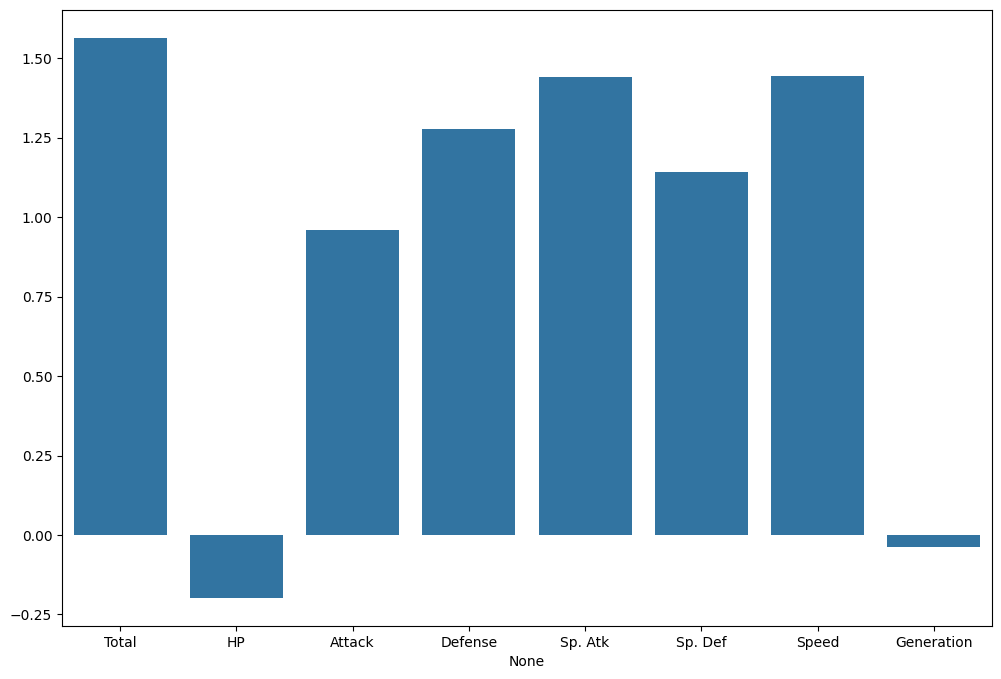

In [25]:
plt.figure(figsize= (12, 8))
sns.barplot(x= coef.index, y= coef.values)

## *Performance*

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [27]:
prediction = log_model.predict(scaled_X_test)

In [28]:
accuracy_score(y_test, prediction)

0.968609865470852

In [29]:
confusion_matrix(y_test, prediction)

array([[204,   3],
       [  4,  12]])

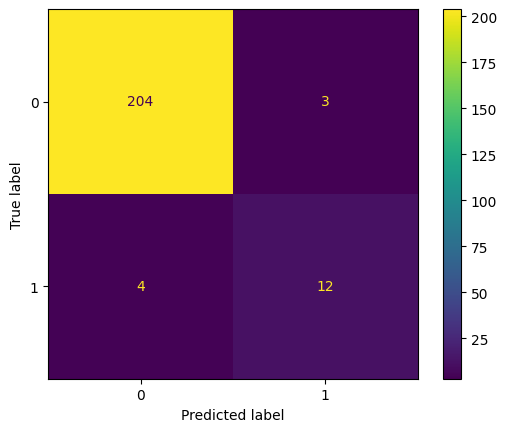

In [30]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)

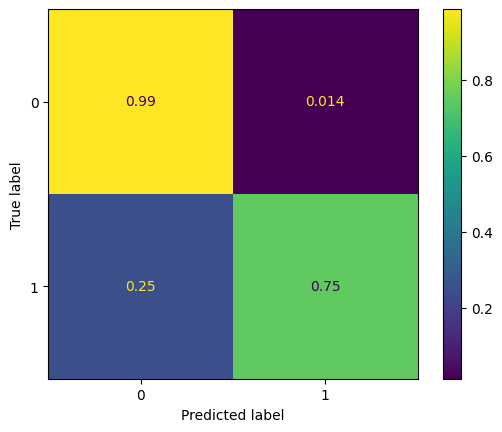

In [31]:
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize= 'true')

In [32]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       207
           1       0.80      0.75      0.77        16

    accuracy                           0.97       223
   macro avg       0.89      0.87      0.88       223
weighted avg       0.97      0.97      0.97       223



In [33]:
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

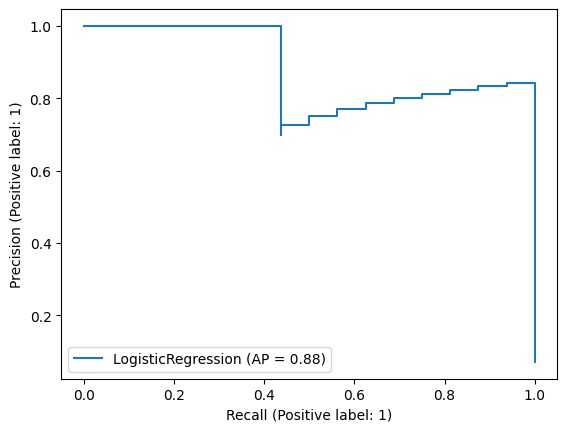

In [34]:
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test)

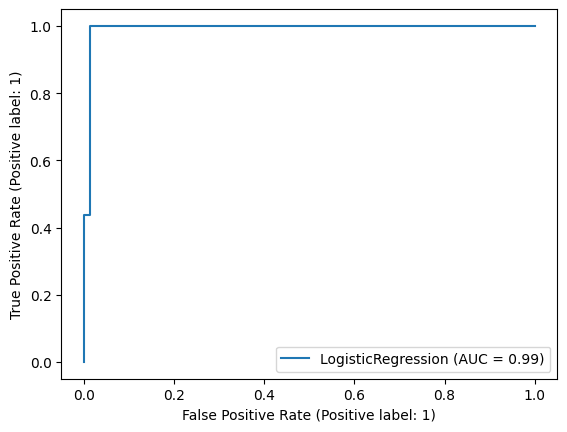

In [35]:
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test)

## *Example*

In [53]:
ex1 = df.iloc[4].values
ex1

array([405,  58,  64,  58,  80,  65,  80,   1,   0])

In [54]:
ex1 = ex1[:-1]
ex1

array([405,  58,  64,  58,  80,  65,  80,   1])

In [55]:
ex1_scaled = scaler.transform([ex1])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [83]:
log_model.predict(ex1_scaled)[0]

0

In [69]:
ex2 = df.iloc[737].values
ex2

array([600, 108, 100, 121,  81,  95,  95,   6,   1])

In [70]:
ex2 = ex2[:-1]
ex2

array([600, 108, 100, 121,  81,  95,  95,   6])

In [71]:
ex2_scaled = scaler.transform([ex2])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [78]:
log_model.predict(ex2_scaled)[0]

0

In [74]:
ex3 = df.iloc[740].values
ex3

array([680,  80, 160,  60, 170, 130,  80,   6,   1])

In [75]:
ex3 = ex3[:-1]
ex3

array([680,  80, 160,  60, 170, 130,  80,   6])

In [81]:
ex3_scaled = scaler.transform([ex3])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [82]:
log_model.predict(ex3_scaled)[0]

1